In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What do the trip durations in Washington look like?**

Warning message:
“Removed 1351 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

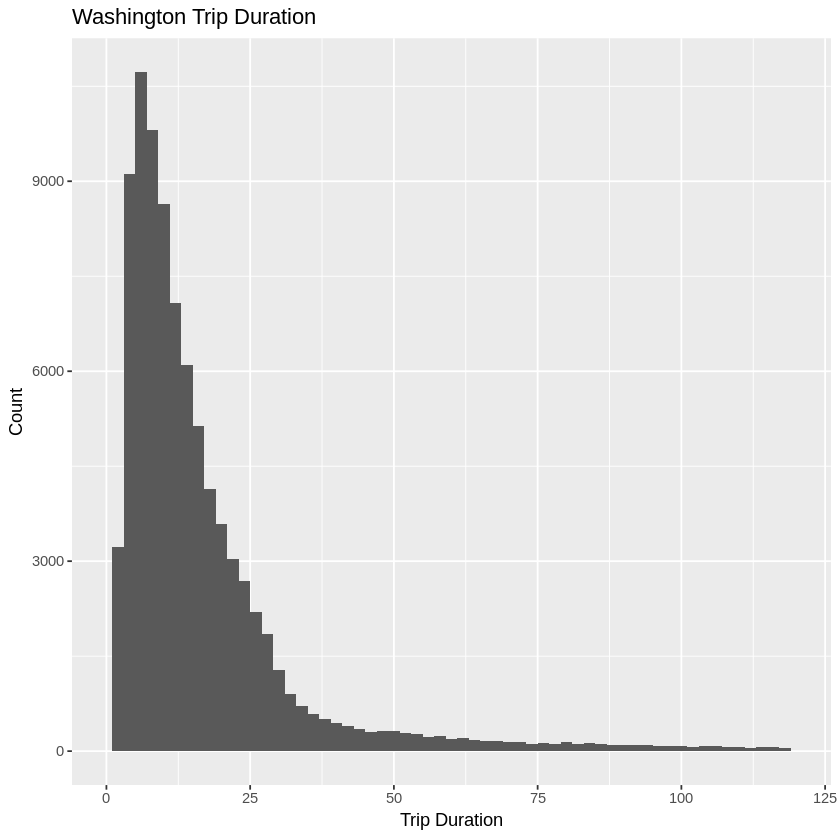

In [6]:
# average for Washington Trip.Duration
# Trip.Duration/60 since the Trip.Duration column is in seconds,
# I'm looking for a count in minutes
ggplot(aes(x=Trip.Duration/60), data = subset(wash, !is.na(Trip.Duration))) +
    geom_histogram(binwidth = 2) +
    scale_x_continuous(limits=c(0,120)) +
    ggtitle('Washington Trip Duration') +
    xlab('Trip Duration') +
    ylab('Count')

**There are 1351 trips that last over 2 hours, but these are outliers. I stopped the count at 120 minutes to get a better look at how long the bulk of the trips are. Most trips look are less than 20 minutes, tapering off sharply at about half an hour.**

### Question 2

**Are there more male or female subscribers in Chicago?**

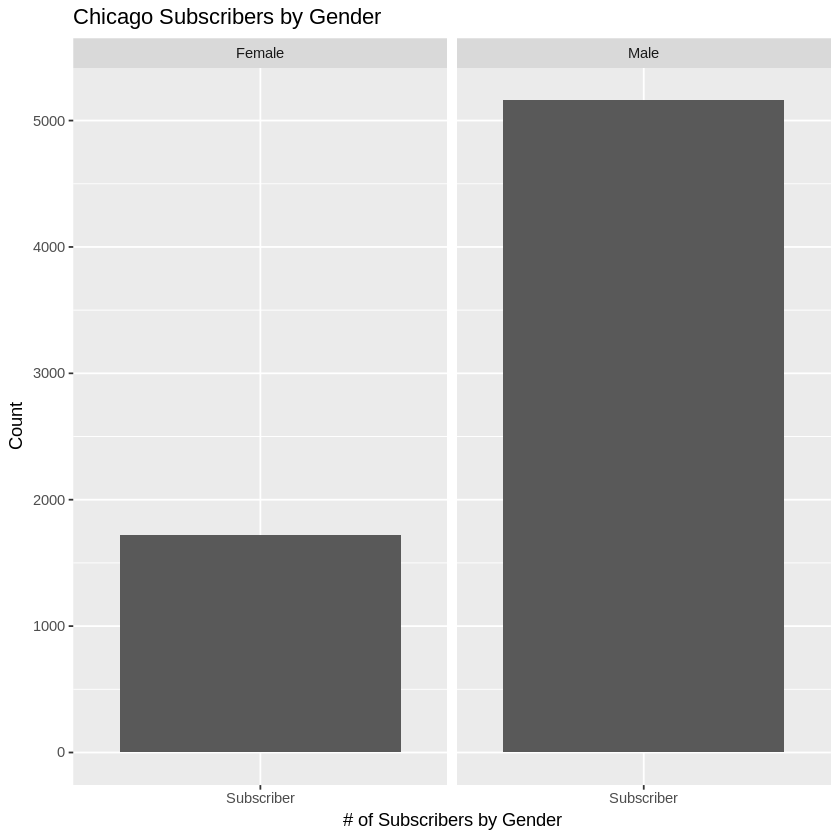

In [7]:
# first line to change "" to na borrowed from
# https://stackoverflow.com/a/12764040
chi[chi==""] <- NA
ggplot(aes(x=User.Type), data=subset(chi, !is.na(Gender))) +
    geom_bar() +
    scale_x_discrete(na.translate = FALSE) +
    facet_wrap(~Gender) +
    ggtitle("Chicago Subscribers by Gender") +
    xlab('# of Subscribers by Gender') +
    ylab('Count')

**Chicago has almost 3x as many male subscribers as female subscribers. Female subscribers number around 1700, while male subscribers number over 5000.**

### Question 3

**What does the birth year by gender look like in New York?**

Warning message:
“Removed 31 rows containing missing values (geom_point).”

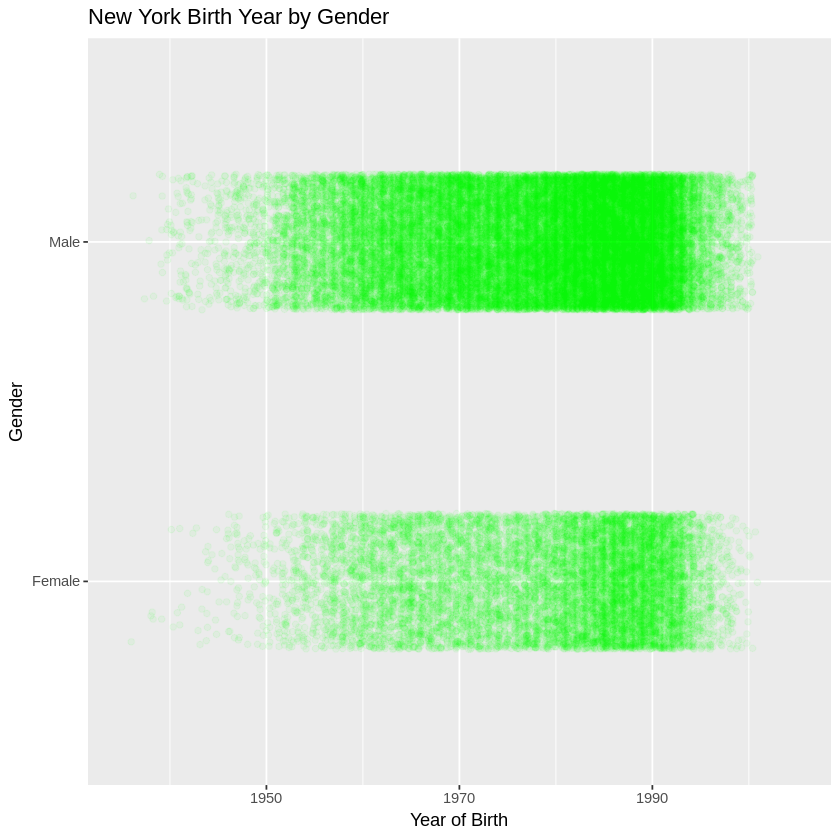

In [9]:
ny[ny==""] <- NA
ggplot(aes(x=Birth.Year, y=Gender), data=subset(ny, !is.na(Gender))) +
    geom_point(alpha=0.05, position=position_jitter(h=0.2), color="green") +
    scale_x_continuous(limits=c(1935,2005)) +
    ggtitle("New York Birth Year by Gender") +
    xlab('Year of Birth') +
    ylab('Gender')

**I cut the year of birth at 1935. Even in 2017 when this data is gathered, that is an 82 year old riding a bike. Not out of the ordinary, but anything past that seems like the birth year is incorrect. Here we see that both genders have a spread in later years. Females look to be mostly born in the 80's to the mid 90's, where males look to be mostly in that range as well, but more heavily spread into the 1950's as well**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [10]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')